# Group 9: Diabetes Prediction

second edition: Use deep neutron network

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import tqdm

## Data Preprocessing and EDA

In [3]:
# load dataset
df = pd.read_excel("./diabetes_prediction_dataset.xlsx")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [8]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [9]:
gender_mapping = {
    'Male': 0,
    'Female': 1,
    'Other': None
}

df['gender_female'] = df['gender'].map(gender_mapping)
df.drop(columns=['gender'], inplace=True)

In [10]:
# for smoking_history use label encoding
smoking_mapping = {
    'never': 0,
    'former': 1,
    'not current': 2,
    'current': 3,
    'ever': 4,
    'No Info': None  
}
df['smoking_history_mapped'] = df['smoking_history'].map(smoking_mapping)

df.drop(columns=['smoking_history'], inplace=True)

df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_female,smoking_history_mapped
0,80.0,0,1,25.19,6.6,140,0,1.0,0.0
1,54.0,0,0,27.32,6.6,80,0,1.0,NaN
2,28.0,0,0,27.32,5.7,158,0,0.0,0.0
3,36.0,0,0,23.45,5.0,155,0,1.0,3.0
4,76.0,1,1,20.14,4.8,155,0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,1.0,NaN
99996,2.0,0,0,17.37,6.5,100,0,1.0,NaN
99997,66.0,0,0,27.83,5.7,155,0,0.0,1.0
99998,24.0,0,0,35.42,4.0,100,0,1.0,0.0


In [11]:
df['smoking_history_mapped'].isna().sum()

35816

Delete all NA value rows

In [12]:
df.dropna(inplace=True)
df.count()

age                       64172
hypertension              64172
heart_disease             64172
bmi                       64172
HbA1c_level               64172
blood_glucose_level       64172
diabetes                  64172
gender_female             64172
smoking_history_mapped    64172
dtype: int64

Distribution visualize

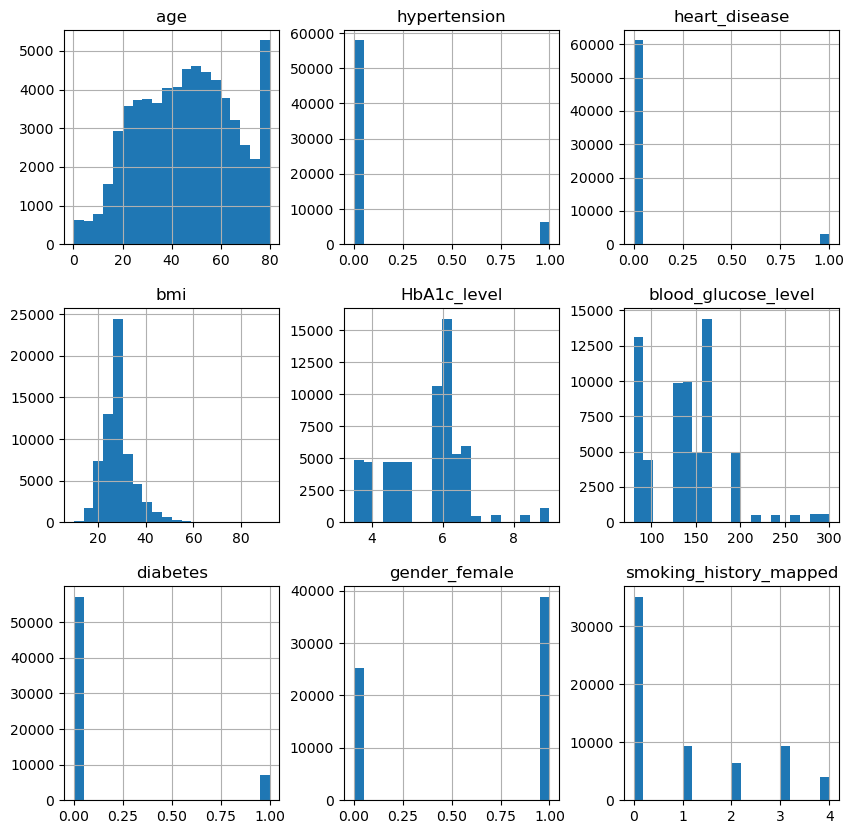

In [13]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

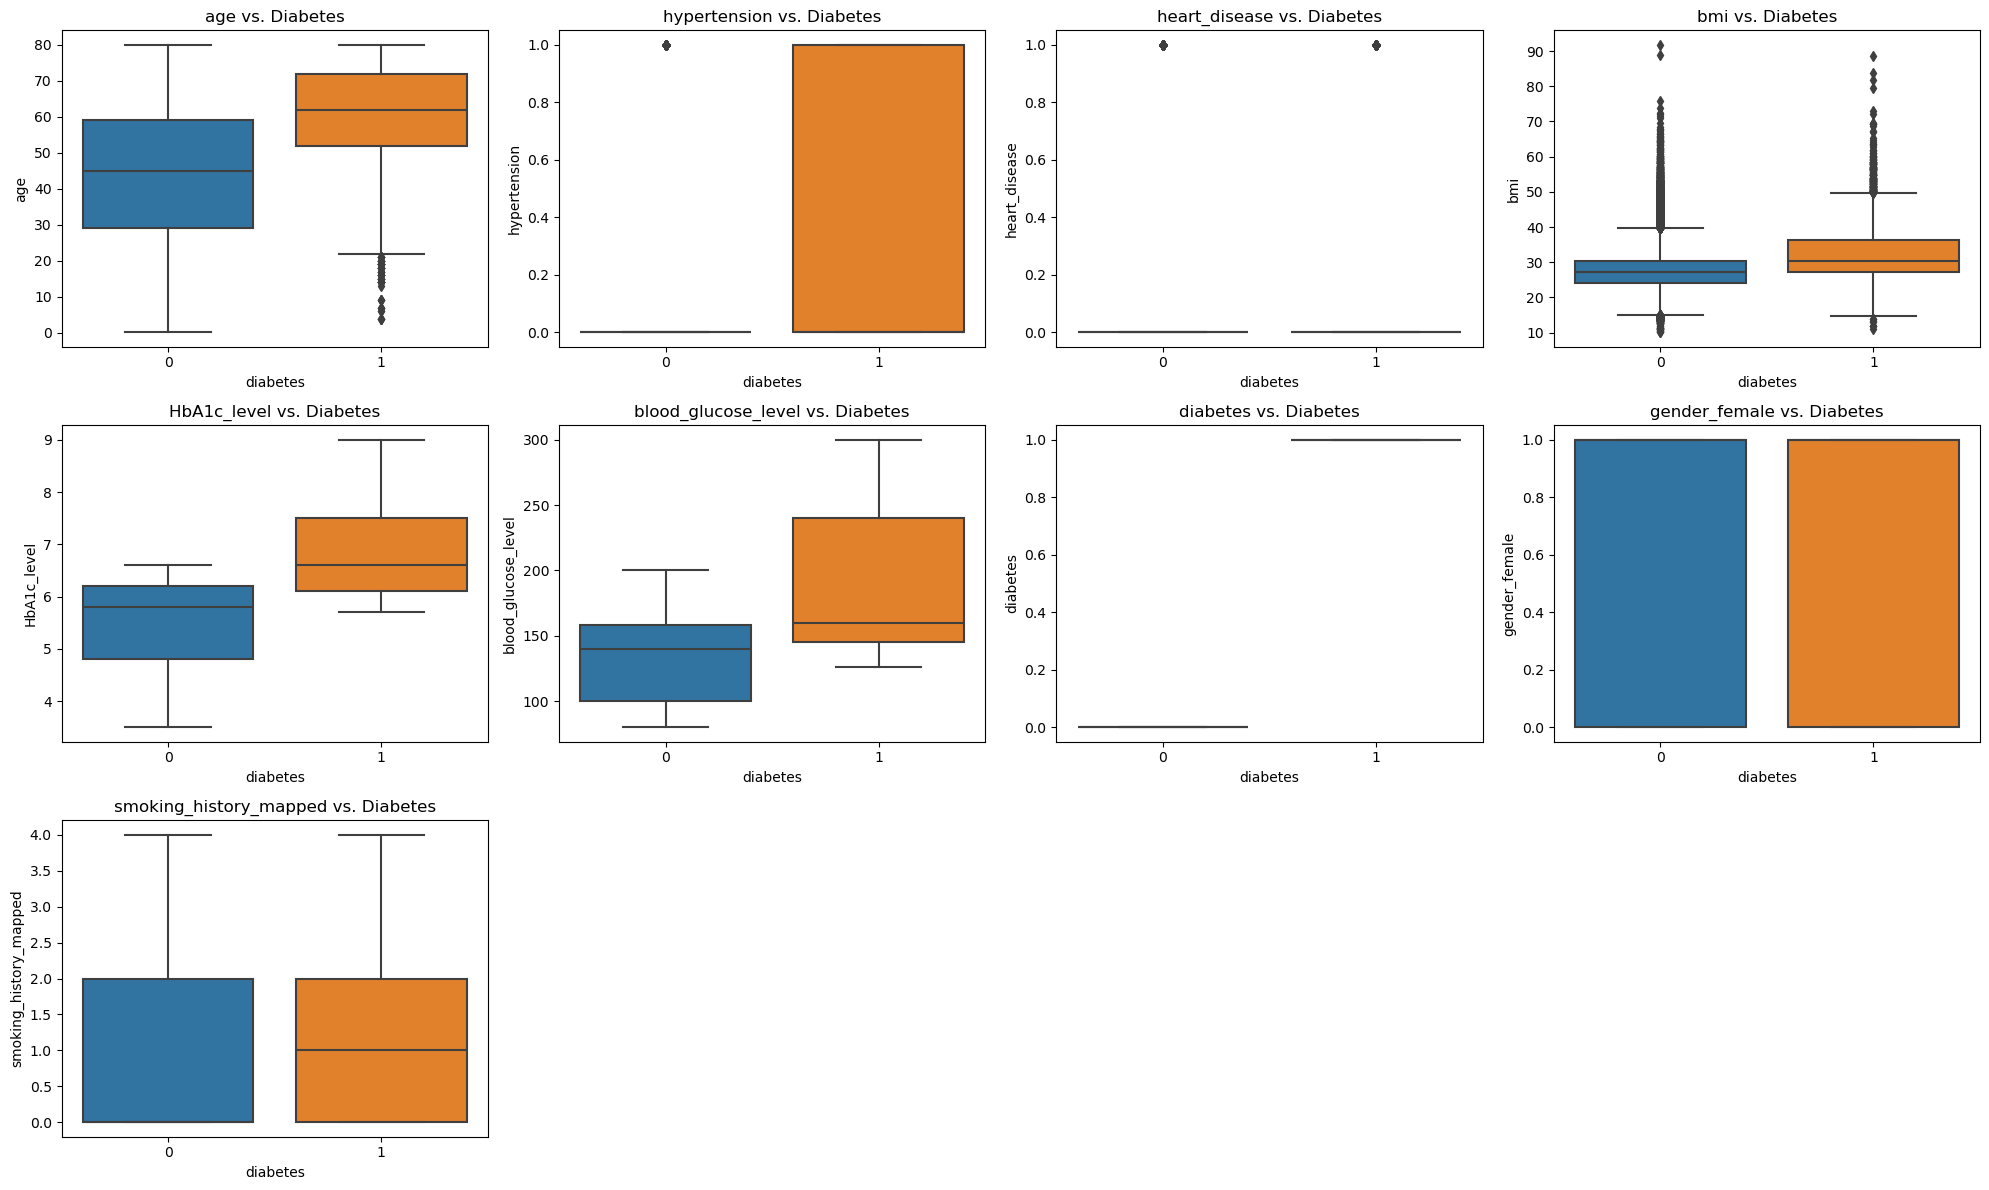

In [14]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 12))

for i, feature in enumerate(numeric_features):
    plt.subplot(3, 4, i+1) 
    sns.boxplot(x='diabetes', y=feature, data=df)
    plt.title(f'{feature} vs. Diabetes')

plt.tight_layout()
plt.show()

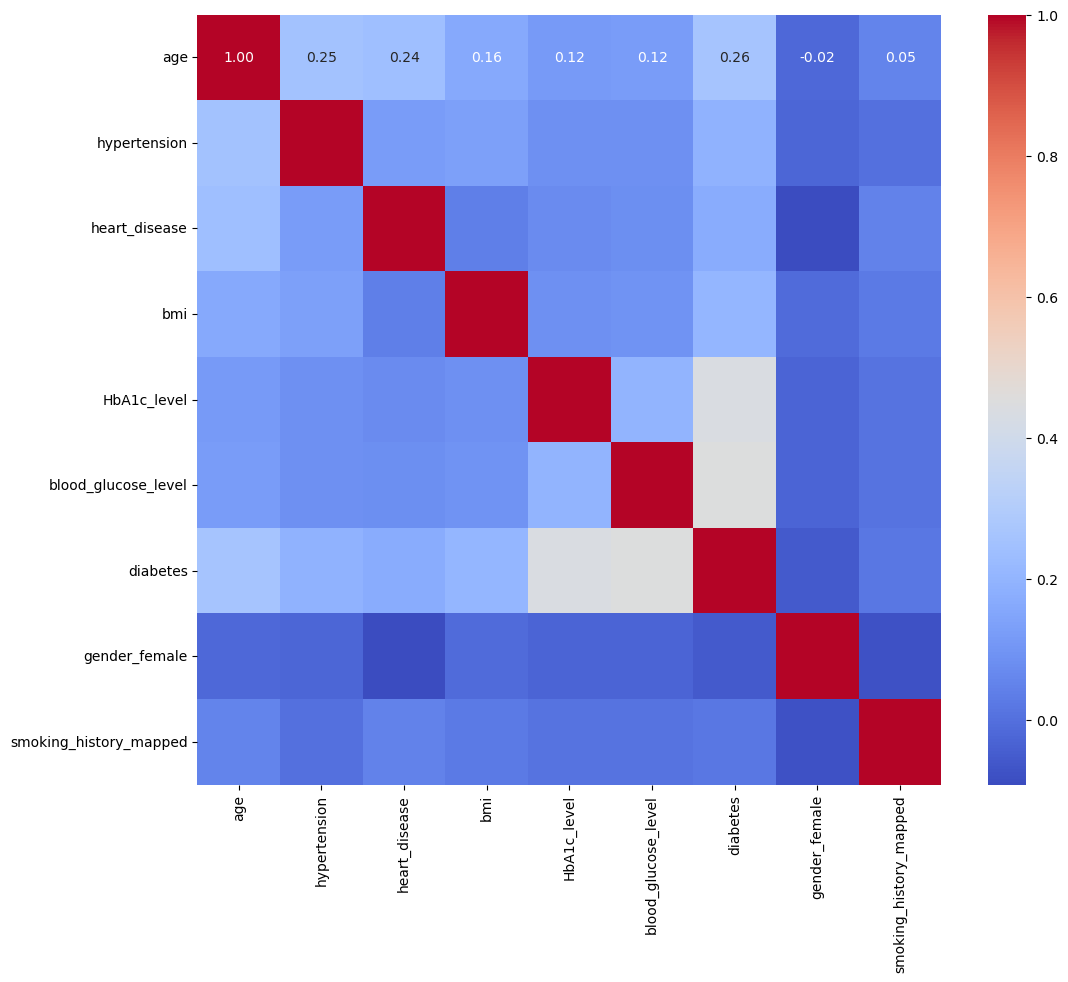

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

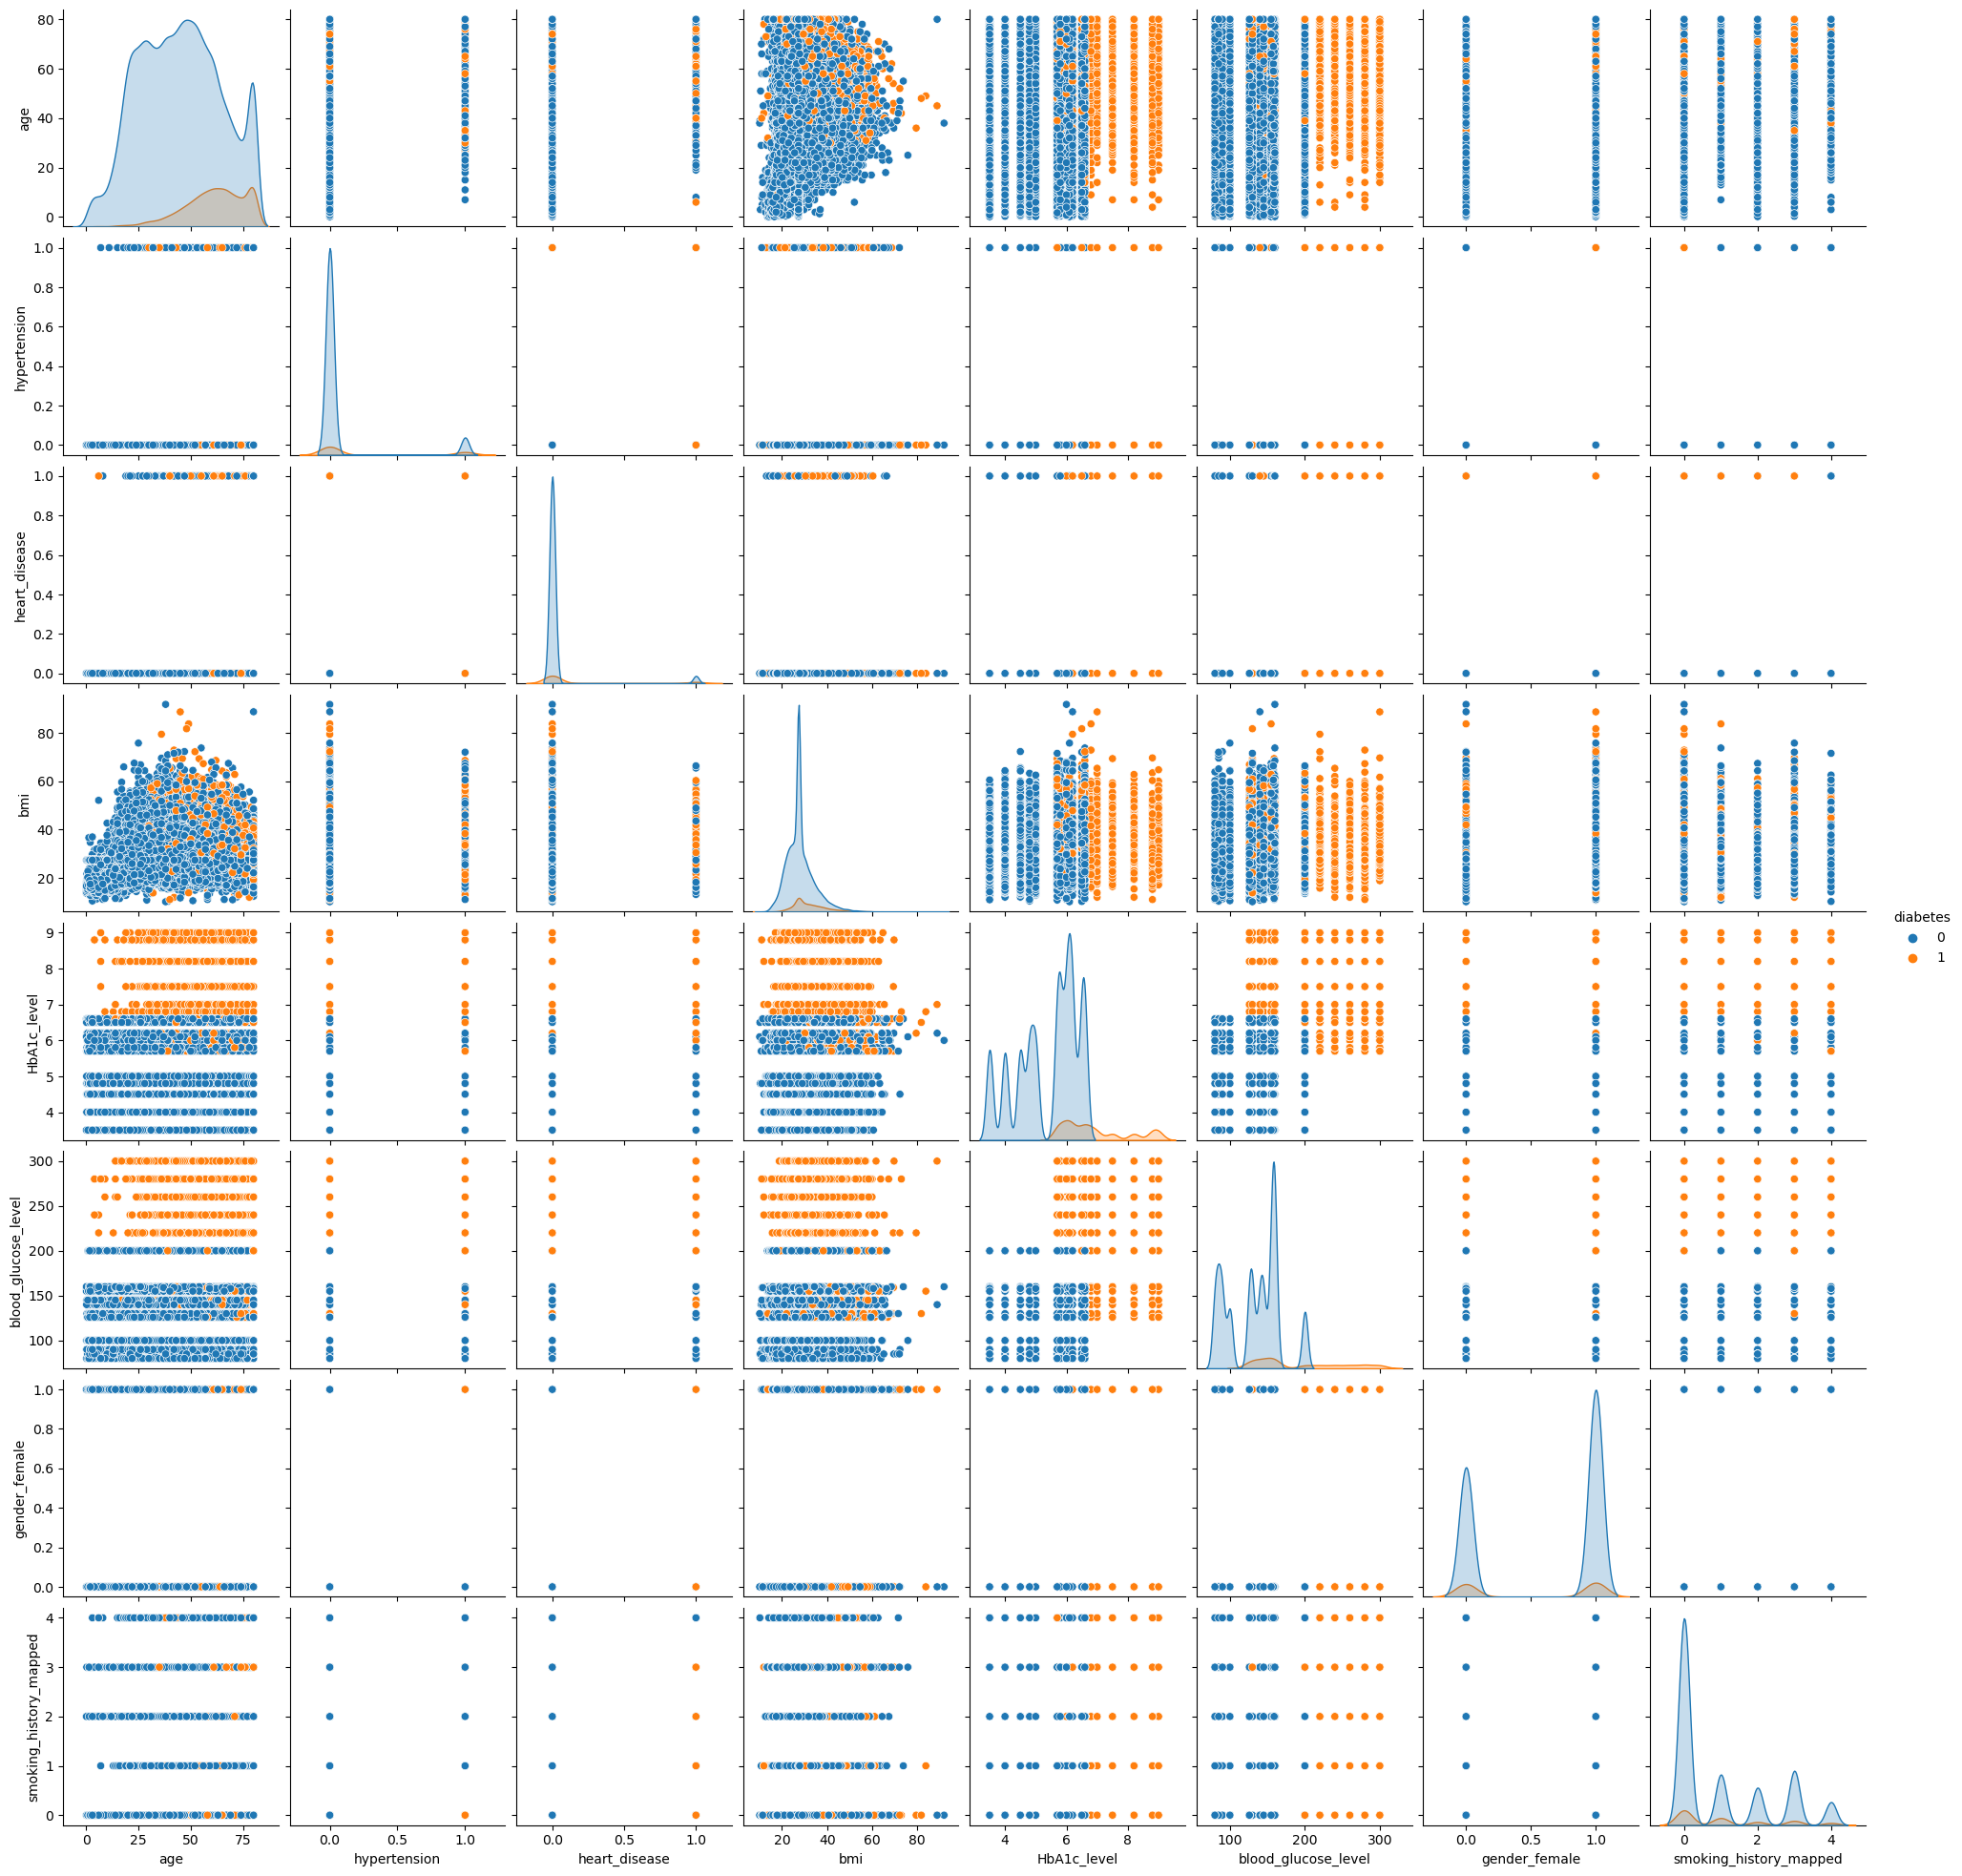

In [16]:
sns.pairplot(df, hue='diabetes', diag_kind='kde')
plt.show()

In [17]:
grouped = df.groupby('diabetes').mean()
grouped

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_female,smoking_history_mapped
diabetes,,,,,,,,
0,44.757243,0.077845,0.034433,27.956466,5.395414,132.970294,0.615219,1.022267
1,61.060034,0.260573,0.149305,32.216953,6.933366,193.622197,0.526114,1.093102


## Data Process and Feature Selection

Data standardize using min-max standardizer (0-1)

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

y = df['diabetes']
X = df.drop(columns=['diabetes'])
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [19]:
X_normalized

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_female,smoking_history_mapped
0,1.000000,0.0,1.0,0.184854,0.563636,0.272727,1.0,0.00
1,0.348697,0.0,0.0,0.210913,0.400000,0.354545,0.0,0.00
2,0.448898,0.0,0.0,0.163567,0.272727,0.340909,1.0,0.75
3,0.949900,1.0,1.0,0.123073,0.236364,0.340909,0.0,0.75
4,0.248497,0.0,0.0,0.210913,0.563636,0.022727,1.0,0.00
...,...,...,...,...,...,...,...,...
64167,0.323647,0.0,0.0,0.296795,0.545455,0.363636,1.0,0.00
64168,0.498998,0.0,0.0,0.374480,0.000000,0.340909,1.0,0.00
64169,0.824649,0.0,0.0,0.217152,0.400000,0.340909,0.0,0.25
64170,0.298597,0.0,0.0,0.310007,0.090909,0.090909,1.0,0.00


use xgboost to compare the feature importance

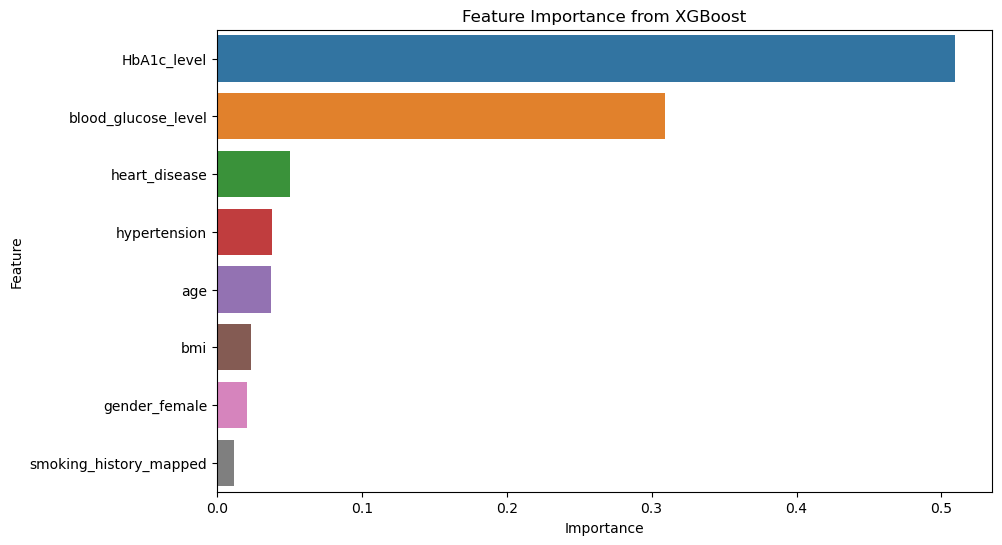

0.9633813790416829

In [20]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

def feature_importance(X, y):
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # create an XGBoost classifier
    xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # fit the classifier to the training data
    xgb_clf.fit(X_train, y_train)

    # make predictions on the test data
    y_pred = xgb_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # print(f"Model Accuracy: {accuracy:.2f}")

    # feature importance
    importance = xgb_clf.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    })
    # sort the features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # plot the feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance from XGBoost')
    plt.show()

    return accuracy


feature_importance(X_normalized, y)

## New Model Construction: DNN

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Function to build the DNN model
def create_dnn_model(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_shape,)))  # First hidden layer with 128 neurons
    model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
    model.add(Dense(64, activation='relu'))  # Second hidden layer with 64 neurons
    model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
    model.add(Dense(32, activation='relu'))  # Third hidden layer with 32 neurons
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Compile the model with binary cross-entropy loss and accuracy metric
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_dnn_model(X_train.shape[1])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Predict on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary output (0 or 1)

# Output model evaluation results
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/50
1284/1284 [==============================] - 2s 951us/step - loss: 0.2191 - accuracy: 0.9215 - val_loss: 0.1423 - val_accuracy: 0.9495
Epoch 2/50
1284/1284 [==============================] - 1s 917us/step - loss: 0.1576 - accuracy: 0.9428 - val_loss: 0.1314 - val_accuracy: 0.9531
Epoch 3/50
1284/1284 [==============================] - 1s 879us/step - loss: 0.1469 - accuracy: 0.9474 - val_loss: 0.1292 - val_accuracy: 0.9539
Epoch 4/50
1284/1284 [==============================] - 1s 898us/step - loss: 0.1393 - accuracy: 0.9500 - val_loss: 0.1274 - val_accuracy: 0.9537
Epoch 5/50
1284/1284 [==============================] - 1s 827us/step - loss: 0.1360 - accuracy: 0.9505 - val_loss: 0.1246 - val_accuracy: 0.9552
Epoch 6/50
1284/1284 [==============================] - 1s 818us/step - loss: 0.1299 - accuracy: 0.9533 - val_loss: 0.1155 - val_accuracy: 0.9585
Epoch 7/50
1284/1284 [==============================] - 1s 808us/step - loss: 0.1292 - accuracy: 0.9526 - val_loss: 0.1248 -

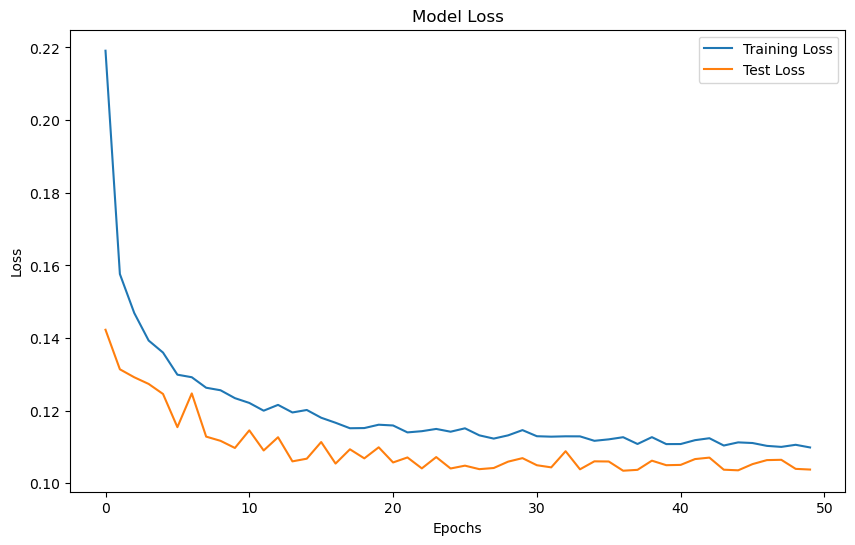

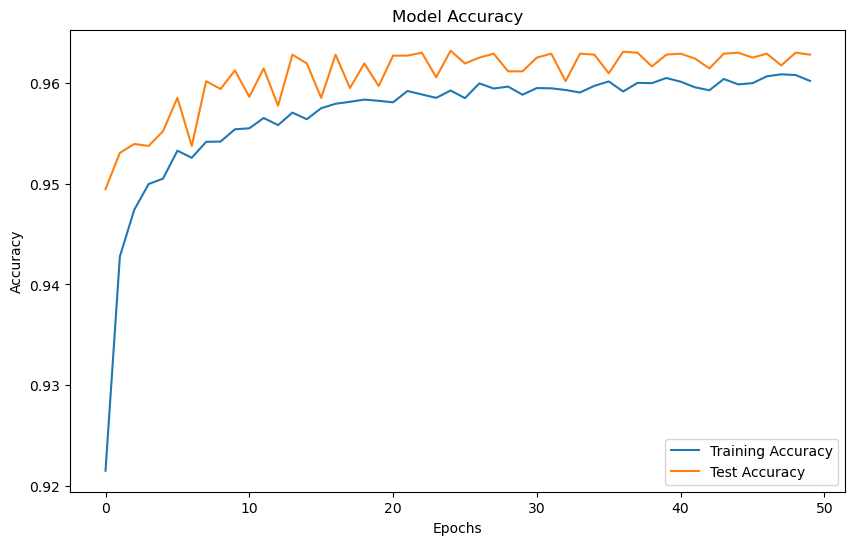

In [22]:
# Plot Model Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Model Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


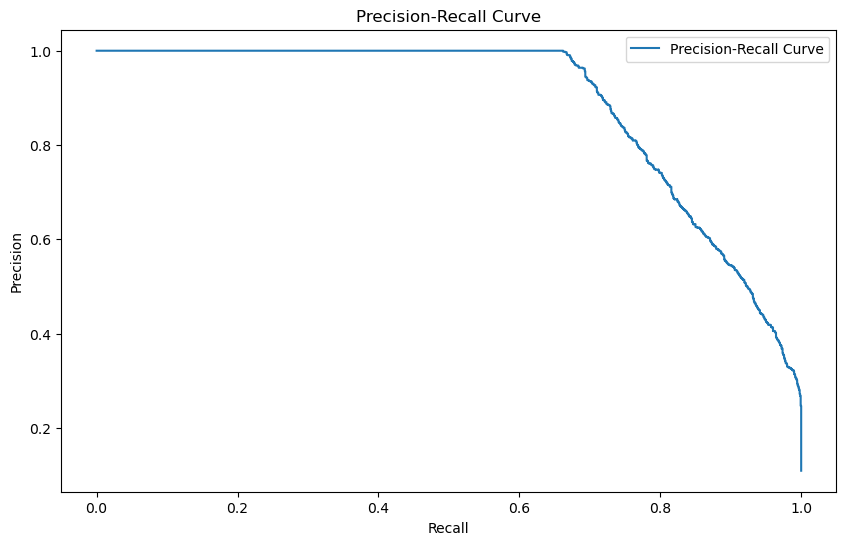

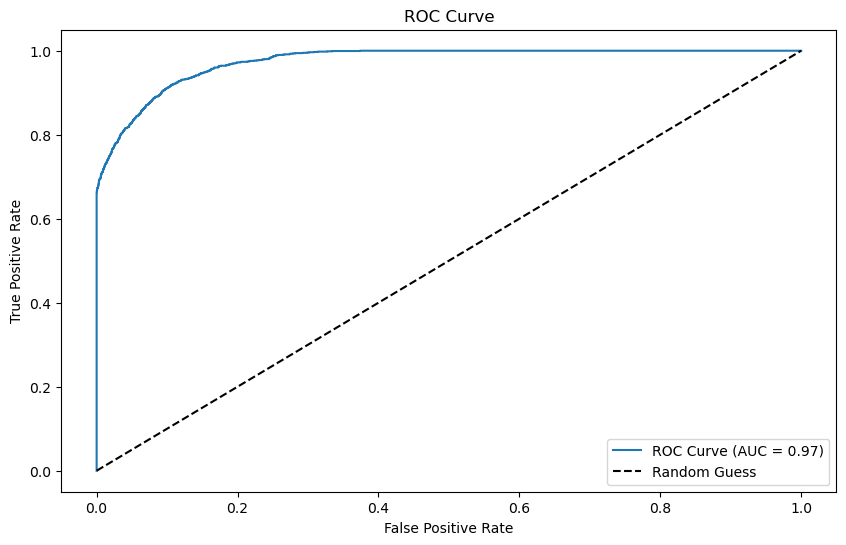

In [23]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

#Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


## Resampling and Adjust parameters

**the accuracy is too high, meaning the model relies too much on the samples with label "0".**
\
So we need to balance the data. 

In [24]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',  # Automatically balance class weights
    classes=np.array([0, 1]),  # Class labels
    y=np.array(y_train)  # Training target variable
) # use numpy array

class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Computed class weights: {class_weights_dict}")

# Create and train the DNN model (same structure as before)
model_with_weights = create_dnn_model(X_train.shape[1])

# Retrain the model with class weights
history_with_weights = model_with_weights.fit(
    X_train, 
    np.array(y_train),  # use numpy array!
    validation_split=0.2, 
    epochs=50, 
    batch_size=50, 
    verbose=1, 
    class_weight=class_weights_dict  # Add class weights
)

y_pred_proba_weighted = model_with_weights.predict(X_test)
y_pred_weighted = (y_pred_proba_weighted > 0.7).astype(int)

print("Classification Report with Class Weights:")
print(classification_report(y_test, y_pred_weighted))


Computed class weights: {0: 0.5617845965288569, 1: 4.54631597591215}
Epoch 1/50
822/822 [==============================] - 1s 1ms/step - loss: 0.4164 - accuracy: 0.7864 - val_loss: 0.2913 - val_accuracy: 0.8610
Epoch 2/50
822/822 [==============================] - 1s 986us/step - loss: 0.3098 - accuracy: 0.8526 - val_loss: 0.2497 - val_accuracy: 0.8747
Epoch 3/50
822/822 [==============================] - 1s 971us/step - loss: 0.2925 - accuracy: 0.8598 - val_loss: 0.3108 - val_accuracy: 0.8228
Epoch 4/50
822/822 [==============================] - 1s 956us/step - loss: 0.2767 - accuracy: 0.8627 - val_loss: 0.2279 - val_accuracy: 0.8737
Epoch 5/50
822/822 [==============================] - 1s 958us/step - loss: 0.2681 - accuracy: 0.8633 - val_loss: 0.2684 - val_accuracy: 0.8450
Epoch 6/50
822/822 [==============================] - 1s 1ms/step - loss: 0.2580 - accuracy: 0.8597 - val_loss: 0.2303 - val_accuracy: 0.8823
Epoch 7/50
822/822 [==============================] - 1s 982us/step - l

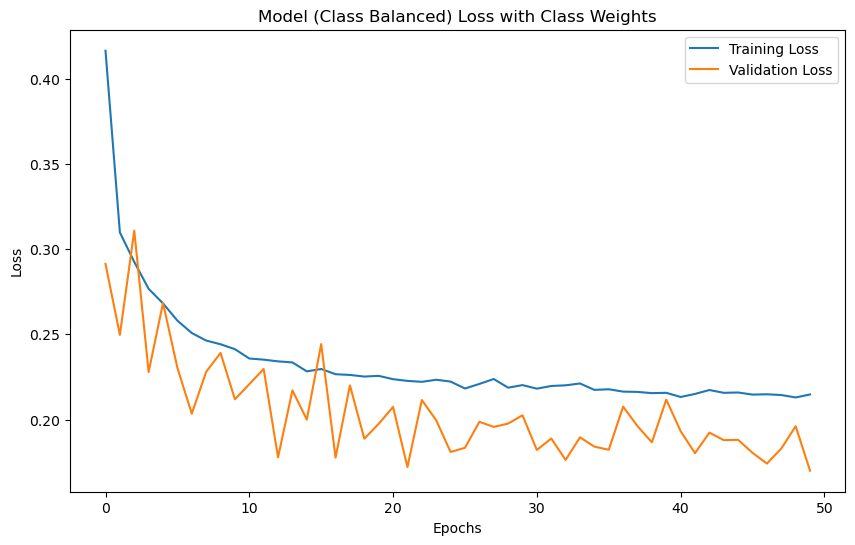

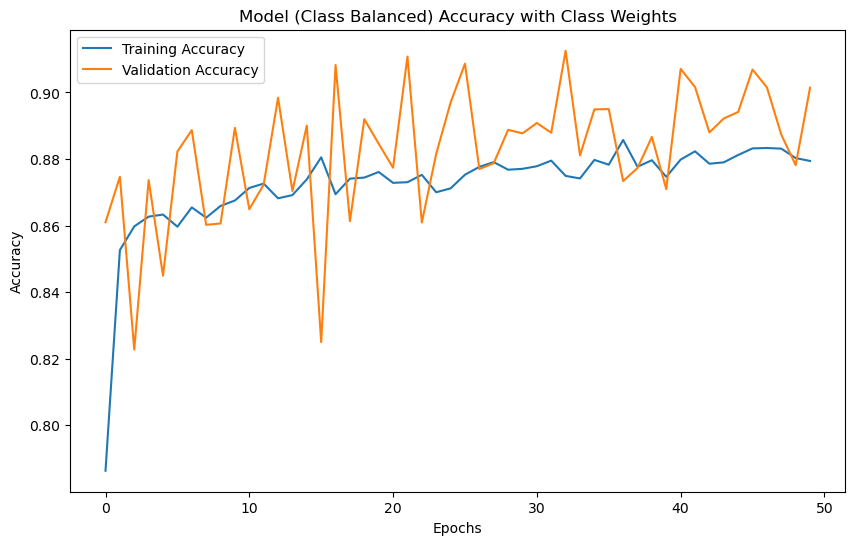

In [25]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_with_weights.history['loss'], label='Training Loss')
plt.plot(history_with_weights.history['val_loss'], label='Validation Loss')
plt.title('Model (Class Balanced) Loss with Class Weights')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_with_weights.history['accuracy'], label='Training Accuracy')
plt.plot(history_with_weights.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model (Class Balanced) Accuracy with Class Weights')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


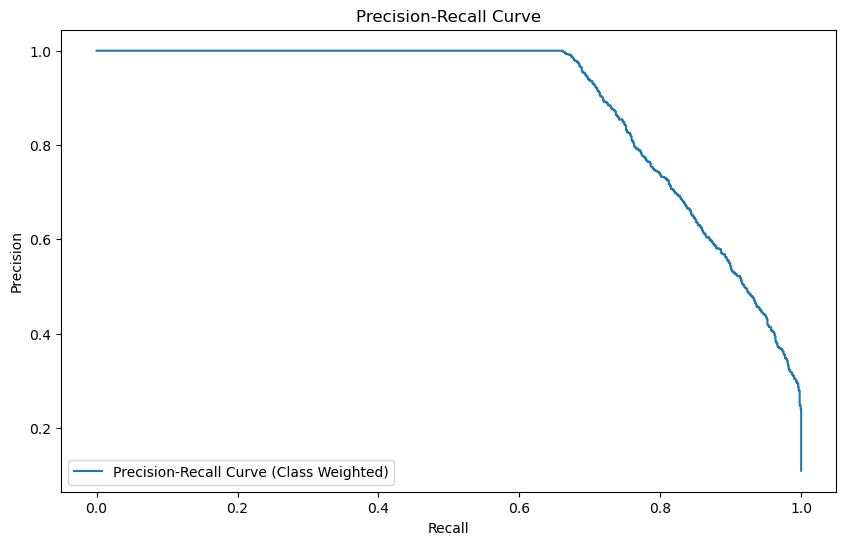

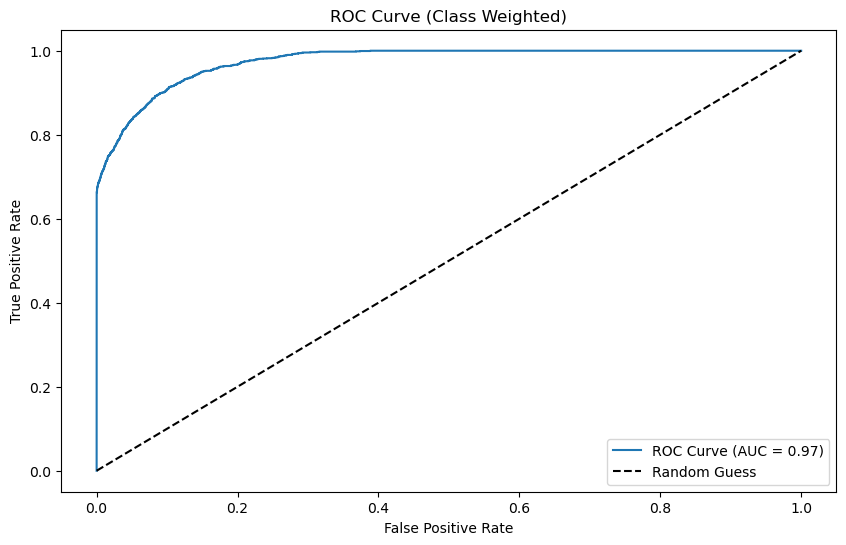

In [26]:
#Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_weighted)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve (Class Weighted)')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba_weighted)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve (Class Weighted)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Adjusted the class weights in the loss function to further emphasize the minority class (1) during training. This helped the model prioritize correctly identifying samples from the minority class, reducing false negatives and improving the recall for class 1.

Changed the default classification threshold from 0.5 to 0.6. By raising the threshold, the model required a higher probability to classify a sample as 1. This reduced false positives, increasing the precision of the minority class.

The F1-score for class 1 increased significantly, reflecting a better balance between precision and recall.
The model's overall performance improved, with better metrics for both classes (0 and 1). This demonstrates that the adjustments helped mitigate the imbalance issue.

### SMOTE oversampling methods for label 1

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Split the resampled dataset into training and validation sets
X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Train the model on the resampled dataset
model_with_smote = create_dnn_model(X_train_resampled.shape[1])
history_with_smote = model_with_smote.fit(
    X_train_resampled, 
    y_train_resampled, 
    validation_data=(X_val_resampled, y_val_resampled),
    epochs=50, 
    batch_size=50, 
    verbose=1
)

# Evaluate the model
y_pred_proba_smote = model_with_smote.predict(X_test)
y_pred_smote = (y_pred_proba_smote > 0.7).astype(int)

print("Classification Report with SMOTE:")
print(classification_report(y_test, y_pred_smote))

Epoch 1/50
1463/1463 [==============================] - 2s 980us/step - loss: 0.3381 - accuracy: 0.8368 - val_loss: 0.2535 - val_accuracy: 0.8732
Epoch 2/50
1463/1463 [==============================] - 1s 942us/step - loss: 0.2615 - accuracy: 0.8764 - val_loss: 0.2322 - val_accuracy: 0.8889
Epoch 3/50
1463/1463 [==============================] - 1s 963us/step - loss: 0.2437 - accuracy: 0.8822 - val_loss: 0.2211 - val_accuracy: 0.8921
Epoch 4/50
1463/1463 [==============================] - 1s 959us/step - loss: 0.2334 - accuracy: 0.8854 - val_loss: 0.2154 - val_accuracy: 0.8945
Epoch 5/50
1463/1463 [==============================] - 1s 971us/step - loss: 0.2265 - accuracy: 0.8887 - val_loss: 0.2173 - val_accuracy: 0.8947
Epoch 6/50
1463/1463 [==============================] - 1s 950us/step - loss: 0.2217 - accuracy: 0.8903 - val_loss: 0.2097 - val_accuracy: 0.8975
Epoch 7/50
1463/1463 [==============================] - 1s 947us/step - loss: 0.2178 - accuracy: 0.8921 - val_loss: 0.2030 -

### Undersampling method for label 0 

In [28]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling to the majority class
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

# Check class distribution after undersampling
print("Class distribution after undersampling:", dict(pd.Series(y_undersampled).value_counts()))

# Train and evaluate the model with undersampled data
model_undersampled = create_dnn_model(X_train.shape[1])

history_undersampled = model_undersampled.fit(
    X_undersampled, 
    y_undersampled, 
    validation_split=0.2, 
    epochs=50, 
    batch_size=50, 
    verbose=1
)

# Predictions
y_pred_proba_undersampled = model_undersampled.predict(X_test)
y_pred_undersampled = (y_pred_proba_undersampled > 0.7).astype(int)

print("Classification Report with Undersampling:")
print(classification_report(y_test, y_pred_undersampled))


Class distribution after undersampling: {0: 5646, 1: 5646}
Epoch 1/50
181/181 [==============================] - 1s 1ms/step - loss: 0.5457 - accuracy: 0.7344 - val_loss: 0.3791 - val_accuracy: 0.8194
Epoch 2/50
181/181 [==============================] - 0s 1ms/step - loss: 0.3657 - accuracy: 0.8346 - val_loss: 0.4434 - val_accuracy: 0.7809
Epoch 3/50
181/181 [==============================] - 0s 1ms/step - loss: 0.3206 - accuracy: 0.8562 - val_loss: 0.4187 - val_accuracy: 0.7888
Epoch 4/50
181/181 [==============================] - 0s 992us/step - loss: 0.3053 - accuracy: 0.8611 - val_loss: 0.4910 - val_accuracy: 0.7570
Epoch 5/50
181/181 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.8682 - val_loss: 0.3582 - val_accuracy: 0.8181
Epoch 6/50
181/181 [==============================] - 0s 992us/step - loss: 0.2816 - accuracy: 0.8704 - val_loss: 0.3851 - val_accuracy: 0.8017
Epoch 7/50
181/181 [==============================] - 0s 997us/step - loss: 0.2771 - 

### Combine oversampling and undersampling together

In [29]:
from imblearn.combine import SMOTEENN

# Combine SMOTE and undersampling (SMOTEENN)
smote_enn = SMOTEENN(random_state=42)
X_combined, y_combined = smote_enn.fit_resample(X_train, y_train)

# Check class distribution after combined sampling
print("Class distribution after combined sampling:", dict(pd.Series(y_combined).value_counts()))

# Train and evaluate the model with combined sampling
model_combined = create_dnn_model(X_train.shape[1])

history_combined = model_combined.fit(
    X_combined, 
    y_combined, 
    validation_split=0.2, 
    epochs=40, 
    batch_size=40, 
    verbose=1
)

# Predictions
y_pred_proba_combined = model_combined.predict(X_test)
y_pred_combined = (y_pred_proba_combined > 0.6).astype(int)

print("Classification Report with Combined Sampling:")
print(classification_report(y_test, y_pred_combined))


Class distribution after combined sampling: {1: 42511, 0: 39870}
Epoch 1/40
1648/1648 [==============================] - 2s 930us/step - loss: 0.2518 - accuracy: 0.8886 - val_loss: 0.2169 - val_accuracy: 0.8954
Epoch 2/40
1648/1648 [==============================] - 1s 884us/step - loss: 0.1725 - accuracy: 0.9247 - val_loss: 0.1984 - val_accuracy: 0.9082
Epoch 3/40
1648/1648 [==============================] - 1s 886us/step - loss: 0.1576 - accuracy: 0.9302 - val_loss: 0.1487 - val_accuracy: 0.9294
Epoch 4/40
1648/1648 [==============================] - 2s 929us/step - loss: 0.1491 - accuracy: 0.9338 - val_loss: 0.1340 - val_accuracy: 0.9490
Epoch 5/40
1648/1648 [==============================] - 1s 876us/step - loss: 0.1448 - accuracy: 0.9363 - val_loss: 0.1749 - val_accuracy: 0.9196
Epoch 6/40
1648/1648 [==============================] - 1s 885us/step - loss: 0.1415 - accuracy: 0.9368 - val_loss: 0.1690 - val_accuracy: 0.9359
Epoch 7/40
1648/1648 [==============================] - 1s 

It seems no better than simply using undersampling.

### Cross Validation

In [30]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply undersampling
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

# Check class distribution after undersampling
print("Class distribution after undersampling:", dict(pd.Series(y_undersampled).value_counts()))

# Perform Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_undersampled = create_dnn_model(X_undersampled.shape[1])

cv_scores = []
for train_idx, val_idx in skf.split(X_undersampled, y_undersampled):
    X_cv_train, X_cv_val = X_undersampled.iloc[train_idx], X_undersampled.iloc[val_idx]
    y_cv_train, y_cv_val = y_undersampled.iloc[train_idx], y_undersampled.iloc[val_idx]

    # Train the model
    history = model_undersampled.fit(
        X_cv_train, 
        y_cv_train, 
        validation_data=(X_cv_val, y_cv_val), 
        epochs=50, 
        batch_size=50, 
        verbose=0
    )

    # Evaluate on validation set
    val_accuracy = model_undersampled.evaluate(X_cv_val, y_cv_val, verbose=0)[1]
    cv_scores.append(val_accuracy)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")

# Evaluate on Test Data
y_pred_proba = model_undersampled.predict(X_test)
y_pred = (y_pred_proba > 0.7).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred))



Class distribution after undersampling: {0: 5646, 1: 5646}
Cross-Validation Scores: [0.8964143395423889, 0.8986276984214783, 0.8932684063911438, 0.9056687355041504, 0.9083259701728821]
Mean Cross-Validation Accuracy: 0.9005
402/402 [==============================] - 0s 416us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     11435
           1       0.80      0.76      0.78      1400

    accuracy                           0.95     12835
   macro avg       0.88      0.87      0.88     12835
weighted avg       0.95      0.95      0.95     12835



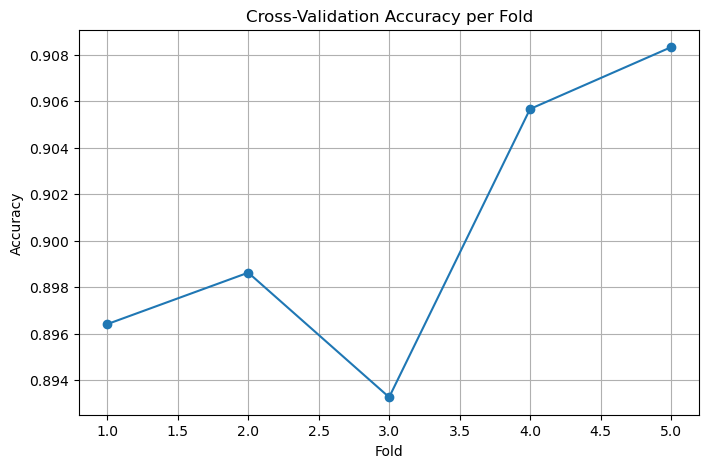

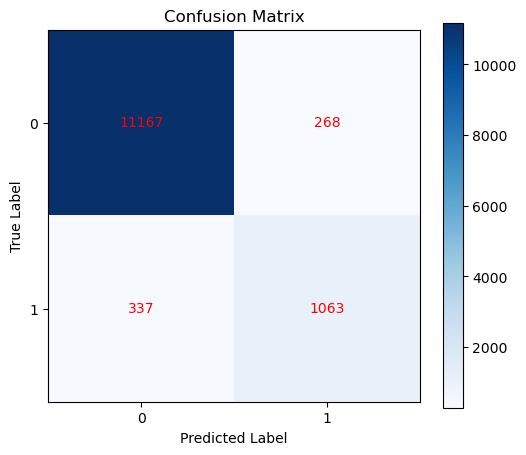

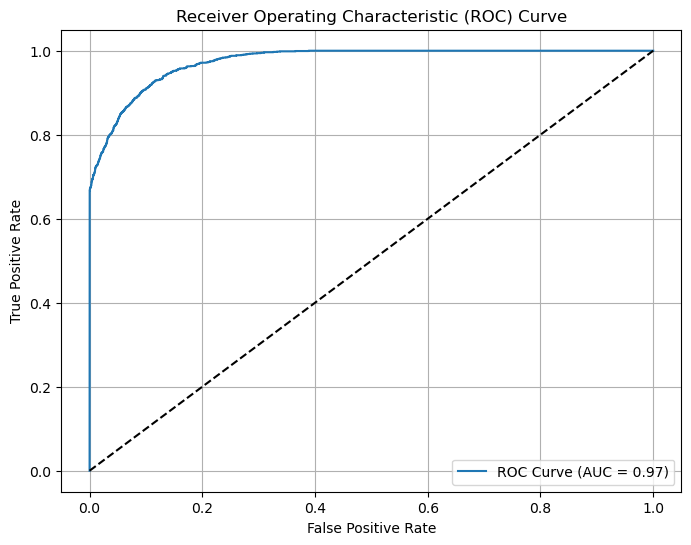

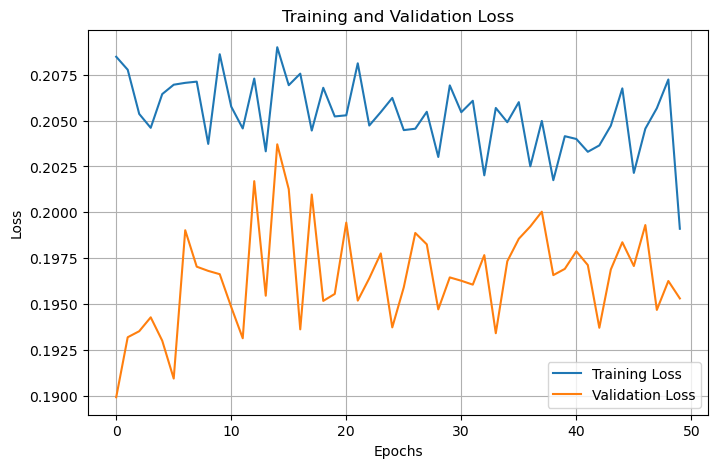

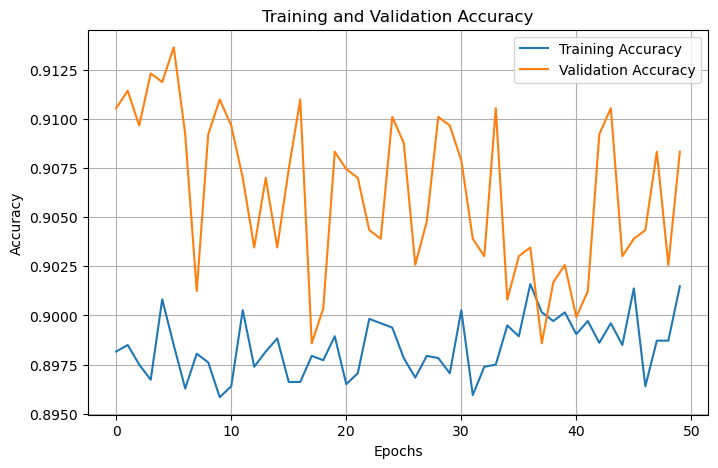

In [31]:
# Visualizations

# Plot Cross-Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o')
plt.title("Cross-Validation Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


## Model Deployment 

In [32]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Function to standardize input data
def standardize_input(raw_data, scaler):
    return scaler.transform([raw_data])  # Use the same scaler applied during preprocessing

# Function to predict diabetes probability
def predict_diabetes(age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, gender_female, smoking_history_mapped):
    # Collect inputs as a list
    input_data = [age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, gender_female, smoking_history_mapped]
    
    # Standardize inputs
    standardized_data = standardize_input(input_data, scaler)
    
    # Predict probability
    probability = model_undersampled.predict(standardized_data)[0][0]
    print(f"\nPredicted Diabetes Probability: {probability:.2f}")

# Define widgets for input fields
age_widget = widgets.FloatSlider(value=30, min=0, max=80, step=1, description='Age:')
hypertension_widget = widgets.Dropdown(options=[0, 1], value=0, description='Hypertension:')
heart_disease_widget = widgets.Dropdown(options=[0, 1], value=0, description='Heart Disease:')
bmi_widget = widgets.FloatSlider(value=25.0, min=10.0, max=50.0, step=0.1, description='BMI:')
HbA1c_widget = widgets.FloatSlider(value=5.5, min=3.5, max=9.0, step=0.1, description='HbA1c:')
blood_glucose_widget = widgets.FloatSlider(value=100, min=70, max=300, step=1, description='Blood Glucose:')
gender_widget = widgets.Dropdown(options=[0, 1], value=0, description='Female Gender:')
smoking_widget = widgets.IntSlider(value=0, min=0, max=4, step=1, description='Smoking History:')

# Button to trigger prediction
predict_button = widgets.Button(description="Predict Diabetes")

# Output area for prediction results
output = widgets.Output()

# Function to handle button click
def on_button_click(b):
    with output:
        output.clear_output()  # Clear previous outputs
        predict_diabetes(
            age_widget.value, 
            hypertension_widget.value, 
            heart_disease_widget.value, 
            bmi_widget.value, 
            HbA1c_widget.value, 
            blood_glucose_widget.value, 
            gender_widget.value, 
            smoking_widget.value
        )

# Attach button click event to the function
predict_button.on_click(on_button_click)

# Display all widgets and output
display(age_widget, hypertension_widget, heart_disease_widget, bmi_widget, HbA1c_widget, blood_glucose_widget, gender_widget, smoking_widget, predict_button, output)


FloatSlider(value=30.0, description='Age:', max=80.0, step=1.0)

Dropdown(description='Hypertension:', options=(0, 1), value=0)

Dropdown(description='Heart Disease:', options=(0, 1), value=0)

FloatSlider(value=25.0, description='BMI:', max=50.0, min=10.0)

FloatSlider(value=5.5, description='HbA1c:', max=9.0, min=3.5)

FloatSlider(value=100.0, description='Blood Glucose:', max=300.0, min=70.0, step=1.0)

Dropdown(description='Female Gender:', options=(0, 1), value=0)

IntSlider(value=0, description='Smoking History:', max=4)

Button(description='Predict Diabetes', style=ButtonStyle())

Output()